<a href="https://colab.research.google.com/github/lavanyaSBeulah/The-Sparks-Foundation/blob/main/Lavanya_Assignment3_3_04June2021PGDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE ON IRIS DATASET

In [1]:
 #Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [2]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()


In [4]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])


Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [5]:
data['Species']=iris['target']


In [6]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])


In [7]:
data.head()


,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


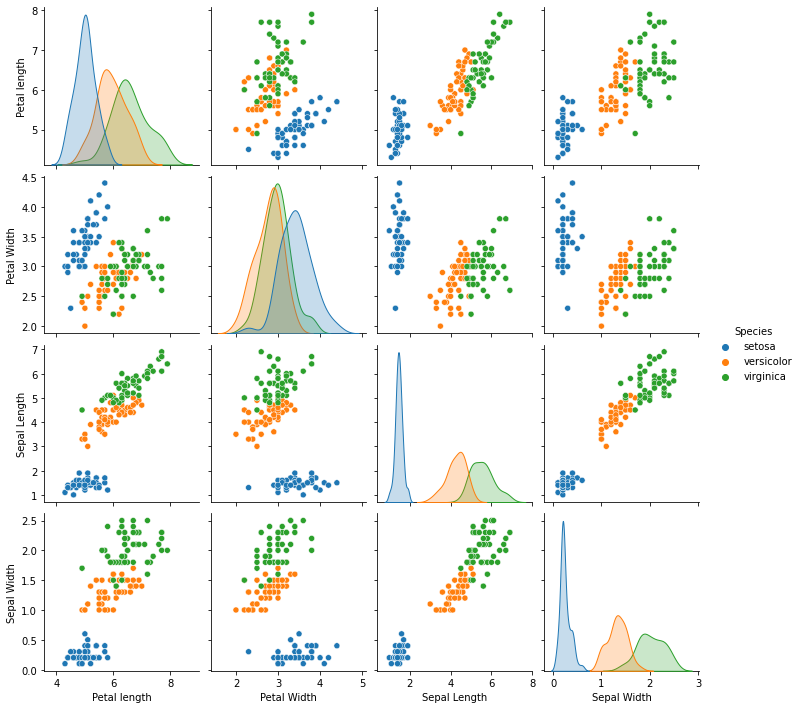

In [8]:
sns.pairplot(data, hue = 'Species')
plt.show()

Preparing the data for Model Building¶


In [9]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [10]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [11]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

Importing Decision Tree from Sklearn to build a classification model¶


In [12]:
from sklearn.tree import DecisionTreeClassifier


In [13]:
DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(train_X, train_y)

In [14]:
DT.predict(test_X)


array(['virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

Let's check accuracy of the model build¶


In [15]:
DT.score(test_X, test_y)


0.9555555555555556

In [16]:
#prediction
y_pred = DT.predict(test_X)

In [17]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 0.9555555555555556


As the model is now ready, moving ahead for the visualization of the Decision Tree¶


In [18]:
!pip install pydotplus


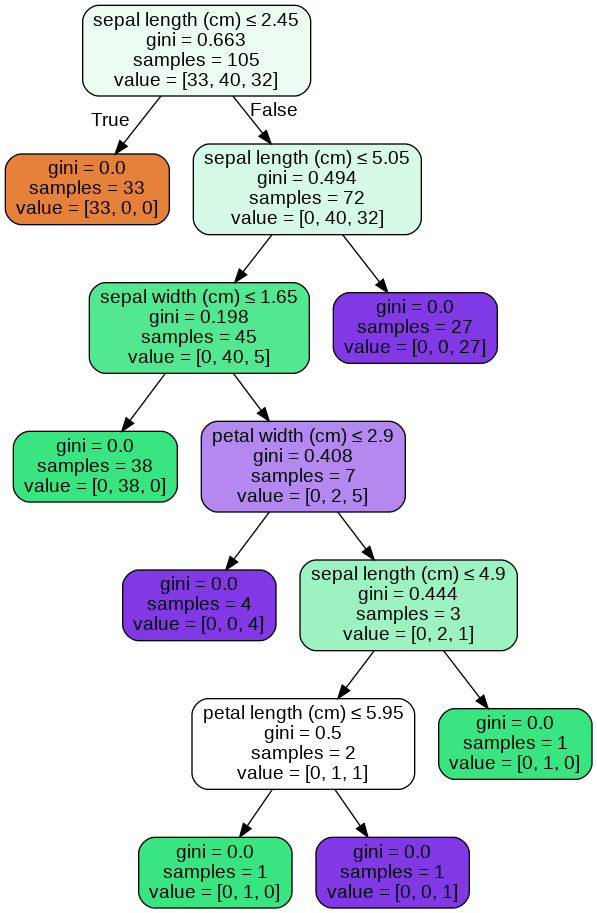

In [19]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])


array(['virginica'], dtype=object)

In [21]:
DT.predict([[4.6, 2.9, 3.6, 5.9]])


array(['versicolor'], dtype=object)